#### Setup

In [15]:
# tokenization
import json
import MeCab
import import_ipynb
import thesis_preprocess
from stopwords.stopwords_ja import stop_words
from stopwords.stopwords_slothlib import stop_words_2

# word2vec
import gensim, logging

# plotting
from sklearn.manifold import TSNE               
import numpy as np                
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#### Clean and Tokenize Tweets

In [2]:
# tokenize cleaned tweets into words
def tokenize(text):
    mt = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    parsed = mt.parseToNode(text)
    components = []
    
    while parsed:
        word = parsed.surface
        pos = parsed.feature.split(",")[0]

        # remove beg/end tokens, particles, fillers, auxiliary bound prefixes/endings
        exclude_pos = ['BOS/EOS', '助詞', 'フィラー', '接頭詞', '助動詞']
        if pos not in exclude_pos: components.append(word)
        parsed = parsed.next
    
    # remove stopwords
    components = [token for token in components if ((not token in stop_words) and (not token in stop_words_2))]
    
    return components

In [16]:
# run preprocessing and tokenization for all tweets from given year dataset
def preprocess_tokenize_all(year):
    # store results and exception tweets
    tokens = []
    retweets = []
    not_parsed = []

    # iterate through tweets, preprocess and tokenize
    with open('datasets_general_years/'+ year + '-all.txt', 'r') as file:
        for line in file:
            tweet = json.loads(line)
            if line == None or tweet == None:
                not_parsed.append((line, tweet))
                print("Parsing error: ", line, tweet)
            elif tweet['retweetedTweet']:
                retweets.append(tweet)
                print("Retweet: ", tweet['id'])
            # filter out 2024 sponsored(?) tweets
            elif int(tweet['date'].split("-")[0]) < int(year) + 1: 
                tweet_text = tweet['rawContent'] # note: need other prop for over 140 char?
                processed = thesis_preprocess.preprocess(tweet_text)            
                components = tokenize(processed)
                tokens.append(components)

    file.close()
    return tokens, retweets, not_parsed

In [17]:
# run for 2015
tokens_2015, retweets_2015, not_parsed_2015 = preprocess_tokenize_all("2015")

# did we get retweets or errors?
print(len(retweets_2015))
print(len(not_parsed_2015))

0
0


In [18]:
len(tokens_2015)

499010

In [8]:
# run for 2022
tokens_2022, retweets_2022, not_parsed_2022 = preprocess_tokenize_all("2022")

# did we get retweets or errors?
print(len(retweets_2022))
print(len(not_parsed_2022))

0
0


#### Word2Vec

In [45]:
# train and save word2vec model for given year
def run_word2vec(year, tokens):
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = gensim.models.Word2Vec(tokens, min_count=5)
    model.save("saved_w2v_models/w2v_model_" + year)

In [46]:
# train and save word2vec model for 2015 
run_word2vec("2015", tokens_2015)

2024-03-26 16:34:06,662 : INFO : collecting all words and their counts
2024-03-26 16:34:06,668 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-26 16:34:06,697 : INFO : PROGRESS: at sentence #10000, processed 56188 words, keeping 17946 word types
2024-03-26 16:34:06,725 : INFO : PROGRESS: at sentence #20000, processed 116418 words, keeping 28687 word types
2024-03-26 16:34:06,748 : INFO : PROGRESS: at sentence #30000, processed 174188 words, keeping 36993 word types
2024-03-26 16:34:06,770 : INFO : PROGRESS: at sentence #40000, processed 229421 words, keeping 43533 word types
2024-03-26 16:34:06,796 : INFO : PROGRESS: at sentence #50000, processed 284624 words, keeping 49608 word types
2024-03-26 16:34:06,816 : INFO : PROGRESS: at sentence #60000, processed 339367 words, keeping 55022 word types
2024-03-26 16:34:06,840 : INFO : PROGRESS: at sentence #70000, processed 400021 words, keeping 60729 word types
2024-03-26 16:34:06,863 : INFO : PROGRESS: at s

In [9]:
# train and save word2vec model for 2022
run_word2vec("2022", tokens_2022)

2023-12-27 14:18:56,026 : INFO : collecting all words and their counts
2023-12-27 14:18:56,028 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-27 14:18:56,047 : INFO : PROGRESS: at sentence #10000, processed 80462 words, keeping 16625 word types
2023-12-27 14:18:56,096 : INFO : PROGRESS: at sentence #20000, processed 159565 words, keeping 20951 word types
2023-12-27 14:18:56,117 : INFO : PROGRESS: at sentence #30000, processed 241422 words, keeping 32244 word types
2023-12-27 14:18:56,152 : INFO : PROGRESS: at sentence #40000, processed 319983 words, keeping 40793 word types
2023-12-27 14:18:56,186 : INFO : PROGRESS: at sentence #50000, processed 397617 words, keeping 44689 word types
2023-12-27 14:18:56,216 : INFO : PROGRESS: at sentence #60000, processed 479082 words, keeping 46657 word types
2023-12-27 14:18:56,249 : INFO : PROGRESS: at sentence #70000, processed 559626 words, keeping 51208 word types
2023-12-27 14:18:56,268 : INFO : PROGRESS: at s

In [23]:
# load trained word2vec model
model_2015 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2015")

# check similarity given by trained model
print(model_2015.wv.most_similar(positive='在日',topn=10))
print(model_2015.wv.most_similar(positive='外国人',topn=10))

2024-03-26 16:22:31,453 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2015
2024-03-26 16:22:31,487 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2015.wv.* with mmap=None
2024-03-26 16:22:31,493 : INFO : setting ignored attribute cum_table to None
2024-03-26 16:22:31,652 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2015', 'datetime': '2024-03-26T16:22:31.652575', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.3.1-x86_64-i386-64bit', 'event': 'loaded'}


[('人種差別', 0.9681127667427063), ('反日', 0.9560563564300537), ('自民', 0.9556175470352173), ('参院', 0.9535259008407593), ('拘束', 0.951295018196106), ('憲法違反', 0.9512634873390198), ('民主', 0.9504404067993164), ('非難', 0.9497846961021423), ('他国', 0.9497363567352295), ('民族', 0.9492263793945312)]
[('韓国人', 0.8849018812179565), ('人質事件', 0.8831086754798889), ('出身', 0.8805031776428223), ('アジア', 0.8722708821296692), ('記者', 0.8704305291175842), ('月給', 0.8682972192764282), ('専門家', 0.8682597279548645), ('中韓', 0.8673125505447388), ('維新', 0.8641927242279053), ('若者', 0.8639814853668213)]


In [11]:
# same for 2022
model_2022 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2022")

print(model_2022.wv.most_similar(positive='在日',topn=10))
print(model_2022.wv.most_similar(positive='外国人',topn=10))

2023-12-27 14:19:20,091 : INFO : loading Word2Vec object from thesis_w2v_2022_tweets
2023-12-27 14:19:20,133 : INFO : loading wv recursively from thesis_w2v_2022_tweets.wv.* with mmap=None
2023-12-27 14:19:20,133 : INFO : setting ignored attribute cum_table to None
2023-12-27 14:19:20,339 : INFO : Word2Vec lifecycle event {'fname': 'thesis_w2v_2022_tweets', 'datetime': '2023-12-27T14:19:20.339315', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.5-x86_64-i386-64bit', 'event': 'loaded'}


[('共産主義', 0.9306224584579468), ('併合', 0.9204510450363159), ('略奪', 0.9177254438400269), ('ナチス', 0.914193332195282), ('イラク', 0.9130715131759644), ('軍事力', 0.9127207398414612), ('従わ', 0.9111466407775879), ('人身売買', 0.9108579158782959), ('諸国', 0.9105721712112427), ('辺野古', 0.9075276255607605)]
[('中国人', 0.8970280885696411), ('自国', 0.894239604473114), ('欧米', 0.8910224437713623), ('中国', 0.8830902576446533), ('日本人', 0.8747531175613403), ('れいわ', 0.8741739988327026), ('イスラム教', 0.8676839470863342), ('独立', 0.8672612905502319), ('教会', 0.8656696677207947), ('カルト', 0.8599515557289124)]


#### Plot Word2Vec Findings

In [26]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
def reduce_dimensions(model):
    num_dimensions = 2

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

In [24]:
# plot similar words
# https://aneesha.medium.com/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229 
# https://albertauyeung.github.io/2020/03/15/matplotlib-cjk-fonts.html/
# https://stackoverflow.com/questions/70268270/how-to-plot-tsne-on-word2vec-created-from-gensim-for-the-most-similar-20-cases

def plot_closest_words(word, model, x_vals, y_vals):
    labels = [i for i in model.wv.index_to_key]
    close_words = [i[0] for i in model.wv.most_similar(positive=word, topn=15)]

    fprop = fm.FontProperties(fname='NotoSansJP-VariableFont_wght.ttf')
    for word in close_words:
        i = labels.index(word)
        plt.scatter(x_vals[i],y_vals[i])
        plt.annotate(labels[i], xy=(x_vals[i], y_vals[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontproperties=fprop)

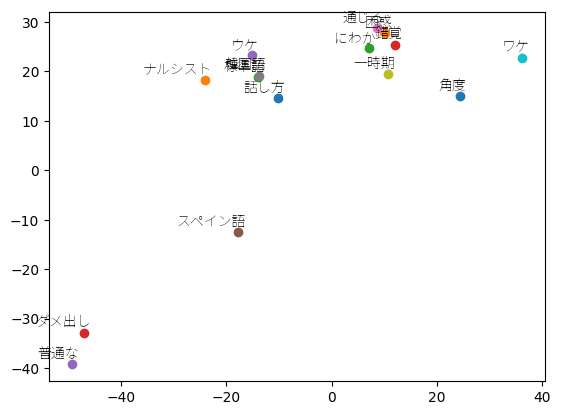

In [27]:
x_vals, y_vals = reduce_dimensions(model_2015)
plot_closest_words("外人", model_2015, x_vals, y_vals)

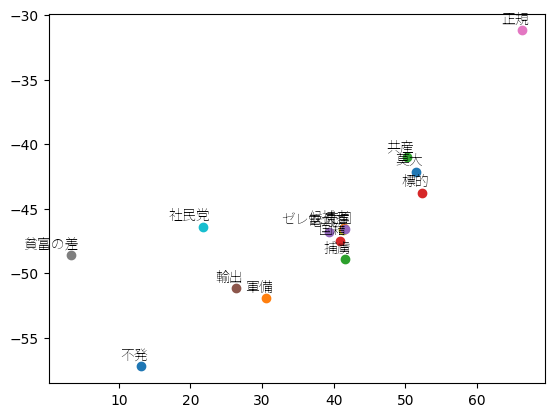

In [21]:
x_vals, y_vals = reduce_dimensions(model_2022)
plot_closest_words("外人", model_2022, x_vals, y_vals)

In [29]:
common = model_2015.wv.index_to_key[:50]
for word in common:
    print(word)

てる
笑
いい
今日
ありがとう
やっ
おはよう
思っ
好き
すぎ
もう
ください
フォロ
み
ノ
くれ
言っ
寝
っ
明日
思う
トレクル
どう
行っ
無料
来
くん
出
まだ
食べ
行く
ちょっと
仕事
おは
くる
お願い
行き
可愛い
めっちゃ
そんな
良い
僕
映像
虫
よく
電
伝
大丈夫
言わ
昨日


In [23]:
common = model_2022.wv.index_to_key[:50]
for word in common:
    print(word)

てる
おはよう
ありがとう
今日
いい
ください
おは
くれ
思っ
参加
すぎ
好き
結果
笑
やっ
み
良い
寝
フォロ
お願い
明日
くん
来
もう
思う
朝
昨日
言っ
キャンペン
すぎる
行っ
出
楽しみ
動画
思い
応募
食べ
っ
仕事
どう
嬉しい
当たる
ござい
おめでとう
起き
可愛い
まだ
本当に
よろしくお願いします
残念


### W2V Similar Words - Minority Groups

In [86]:
def compare_similar_words(keyword:str, model_2015, model_2022, positive=[], negative=[], topn=10):
    if len(positive) == 0: positive = keyword

    # 2015
    print("\nSimilar words to " + keyword + ": 2015")
    try:
        words_15 = model_2015.wv.most_similar(positive=positive, negative=negative, topn=topn)
        for w in words_15:
            print(w[0])
    except:
        print("Error\n")

    # 2022
    print("\nSimilar words to " + keyword + ": 2022")
    try:
        words_22 = model_2022.wv.most_similar(positive=positive, negative=negative, topn=topn)
        for w in words_22:
            print(w[0])
    except:
        print("Error\n")

In [78]:
model_2015 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2015")
model_2022 = gensim.models.Word2Vec.load("saved_w2v_models/w2v_model_2022")

2024-03-28 14:23:16,870 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2015


2024-03-28 14:23:17,008 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2015.wv.* with mmap=None
2024-03-28 14:23:17,014 : INFO : setting ignored attribute cum_table to None
2024-03-28 14:23:17,265 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2015', 'datetime': '2024-03-28T14:23:17.265259', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.3.1-x86_64-i386-64bit', 'event': 'loaded'}
2024-03-28 14:23:17,266 : INFO : loading Word2Vec object from saved_w2v_models/w2v_model_2022
2024-03-28 14:23:17,304 : INFO : loading wv recursively from saved_w2v_models/w2v_model_2022.wv.* with mmap=None
2024-03-28 14:23:17,307 : INFO : setting ignored attribute cum_table to None
2024-03-28 14:23:17,492 : INFO : Word2Vec lifecycle event {'fname': 'saved_w2v_models/w2v_model_2022', 'datetime': '2024-03-28T14:23:17.492934', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:1

In [115]:
# Zainichi Koreans
compare_similar_words("在日", model_2015, model_2022)
# compare_similar_words("在日コリアン", model_2015, model_2022)
# compare_similar_words("在日韓国人", model_2015, model_2022)
# compare_similar_words("韓国人", model_2015, model_2022)


Similar words to 在日: 2015
自民
政策
不正
参院
軍事
ロシア
他国
介入
人種差別
首相

Similar words to 在日: 2022
共産主義
併合
略奪
ナチス
イラク
軍事力
従わ
人身売買
諸国
辺野古


In [51]:
# Ainu
compare_similar_words("アイヌ", model_2015, model_2022)


Similar words to アイヌ: 2015
Error


Similar words to アイヌ: 2022
航空機
非難決議
都市計画
穀物
大輔
超党派
弾薬
数学者
西暦
死去


In [53]:
# Okinawa
compare_similar_words("沖縄", model_2015, model_2022)
compare_similar_words("琉球", model_2015, model_2022)


Similar words to 沖縄: 2015
観光
東北
周辺
北海道
神戸
神奈川
川崎
横浜
関東
品川

Similar words to 沖縄: 2022
観光
東北
博物館
周辺
四国
相模原
札幌
金沢
九州
鎌倉

Similar words to 琉球: 2015
京都市
庭園
西日本
京都府
国内線
足立区
好立地
島根県
札幌市
大田区

Similar words to 琉球: 2022
沈没
神道
上海
習
イギリス東インド会社
誇る
元首相
非難決議
幾
現在地


In [112]:
compare_similar_words("ハフ", model_2015, model_2022, positive=["ハフ","人間","日本人"
                                                              ], negative=["髪","服"])


Similar words to ハフ: 2015
批判
国民
政治
自己
国家
安保法案
政府
憲法
民主党
議員

Similar words to ハフ: 2022
援助
支持
組織
自国
暴力
左翼
教育
若者
欧米
宗教


In [56]:
compare_similar_words("外人", model_2015, model_2022)


Similar words to 外人: 2015
話し方
困惑
標準語
錯覚
ウケ
スペイン語
通じる
韓国語
一時期
ワケ

Similar words to 外人: 2022
不発
軍備
共産
国籍
電力
輸出
正規
貧富の差
ゼレンスキ
社民党


In [57]:
compare_similar_words("外国人", model_2015, model_2022)


Similar words to 外国人: 2015
韓国人
人質事件
出身
アジア
記者
月給
専門家
中韓
維新
若者

Similar words to 外国人: 2022
中国人
自国
欧米
中国
日本人
れいわ
イスラム教
独立
教会
カルト


In [58]:
compare_similar_words("人種差別", model_2015, model_2022)


Similar words to 人種差別: 2015
軍事
憲法違反
民主
介入
自民
参院
大統領
安倍政権
民族
竹島

Similar words to 人種差別: 2022
左派
活動家
欠如
無謀
都民
売国奴
トランスジェンダ
知性
権力者
振りかざし


In [60]:
compare_similar_words("差別", model_2015, model_2022)


Similar words to 差別: 2015
マスコミ
国民
思想
本質
得る
主張
与える
公正
法律
義務

Similar words to 差別: 2022
批判
宗教
犯罪
外交
政治家
立場
主張
常識
政治
加担


In [105]:
compare_similar_words("来日", model_2015, model_2022)


Similar words to 来日: 2015
欧米
球団
山口県
貿易
京大
首都圏
円高
特設
財団
ライセンス

Similar words to 来日: 2022
本拠地
集結
選抜
通算
連盟
修業
琉球
ドキュメンタリ
代役
著名


In [73]:
compare_similar_words("ヘイトスピチ", model_2015, model_2022)


Similar words to ヘイトスピチ: 2015
容認
官邸
愛国
左翼
閣議決定
竹島
言論
保守
歴史的
ナチス

Similar words to ヘイトスピチ: 2022
Error



In [81]:
compare_similar_words("ヘイト", model_2015, model_2022)


Similar words to ヘイト: 2015
ハンド
普遍
倒せる
無敵
加担
ランサ
求愛
干渉
ダイナモ
唱え

Similar words to ヘイト: 2022
法的
同列
既得権益
彼等
社会的
糾弾
見下す
人種差別
定め
従わ


In [65]:
compare_similar_words("マイノリティ", model_2015, model_2022)


Similar words to マイノリティ: 2015
Error


Similar words to マイノリティ: 2022
自認
自他
罰せ
同性愛
見受け
マスメディア
言説
目くそ
弱いっ
レイシスト


### Word2Vec for Minority Group Datasets

In [66]:
import csv

In [67]:
# pass in filename of csv you want to load, including '.csv'
def load_from_csv(filename):
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        tweet_tokens = list(reader)
    return tweet_tokens

In [74]:
# train and save word2vec model for given year
def run_word2vec(tokens):
    # logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    model = gensim.models.Word2Vec(tokens, min_count=5)
    # model.save("saved_w2v_models/w2v_model_" + name)

    return model

In [75]:
tokens_z15 = load_from_csv("saved_tokens/save_tokens_zainichi_2015.csv")
model = run_word2vec(tokens_z15)
common = model.wv.index_to_key[:20]
for word in common:
    print(word)

2024-03-27 16:32:24,708 : INFO : collecting all words and their counts
2024-03-27 16:32:24,709 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-27 16:32:24,730 : INFO : PROGRESS: at sentence #10000, processed 153925 words, keeping 13654 word types
2024-03-27 16:32:24,751 : INFO : PROGRESS: at sentence #20000, processed 305877 words, keeping 19862 word types
2024-03-27 16:32:24,760 : INFO : collected 22136 word types from a corpus of 365268 raw words and 23653 sentences
2024-03-27 16:32:24,761 : INFO : Creating a fresh vocabulary
2024-03-27 16:32:24,775 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 5800 unique words (26.20% of original 22136, drops 16336)', 'datetime': '2024-03-27T16:32:24.775163', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-14.3.1-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2024-03-27 16:32:24,775 : INFO : Word2Vec lifecycle e

在日コリアン
日本
通名
日本人
ヘイトスピチ
在日
てる
韓国
廃止
万人
デマ
起こす
しよ
悪用
詐欺事件
差別
韓国人
強制送還
ネット
弁護士


In [76]:
tokens_z22 = load_from_csv("saved_tokens/save_tokens_zainichi_2022.csv")
model = run_word2vec(tokens_z22)
common = model.wv.index_to_key[:20]
for word in common:
    print(word)

2024-03-27 16:32:27,269 : INFO : collecting all words and their counts
2024-03-27 16:32:27,270 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-27 16:32:27,298 : INFO : PROGRESS: at sentence #10000, processed 165061 words, keeping 18537 word types
2024-03-27 16:32:27,324 : INFO : PROGRESS: at sentence #20000, processed 329767 words, keeping 27445 word types
2024-03-27 16:32:27,350 : INFO : PROGRESS: at sentence #30000, processed 501516 words, keeping 33722 word types
2024-03-27 16:32:27,356 : INFO : collected 34645 word types from a corpus of 532809 raw words and 31901 sentences
2024-03-27 16:32:27,356 : INFO : Creating a fresh vocabulary
2024-03-27 16:32:27,381 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 10037 unique words (28.97% of original 34645, drops 24608)', 'datetime': '2024-03-27T16:32:27.381814', 'gensim': '4.3.2', 'python': '3.11.5 (main, Aug 24 2023, 15:18:16) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 

在日コリアン
差別
日本
日本人
てる
韓国
在日
ください
思う
現代ビジネス
問題
事件
世
読み
ぜひ
寄稿
デマ
言っ
ヘイトスピチ
思っ


In [77]:
tokens = load_from_csv("saved_tokens/save_tokens_ainu_2022.csv")
model = run_word2vec(tokens)
common = model.wv.index_to_key[:20]
for word in common:
    print(word)

2024-03-27 16:34:22,868 : INFO : collecting all words and their counts
2024-03-27 16:34:22,871 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-03-27 16:34:22,901 : INFO : PROGRESS: at sentence #10000, processed 151785 words, keeping 21877 word types
2024-03-27 16:34:22,936 : INFO : PROGRESS: at sentence #20000, processed 308779 words, keeping 31754 word types
2024-03-27 16:34:22,963 : INFO : PROGRESS: at sentence #30000, processed 467357 words, keeping 38819 word types
2024-03-27 16:34:23,002 : INFO : PROGRESS: at sentence #40000, processed 621528 words, keeping 44789 word types
2024-03-27 16:34:23,038 : INFO : PROGRESS: at sentence #50000, processed 777134 words, keeping 50058 word types
2024-03-27 16:34:23,069 : INFO : PROGRESS: at sentence #60000, processed 937547 words, keeping 54965 word types
2024-03-27 16:34:23,102 : INFO : PROGRESS: at sentence #70000, processed 1096698 words, keeping 59376 word types
2024-03-27 16:34:23,151 : INFO : PROGRESS: at

アイヌ
北海道
アイヌ語
てる
アイヌ民族
日本
ロシア
アイヌ文化
先住民族
ゴルデンカムイ
文化
差別
歴史
意味
思う
日本人
民族
思っ
氏
いい
